In [20]:
pip install --upgrade pip

In [21]:
pip install control

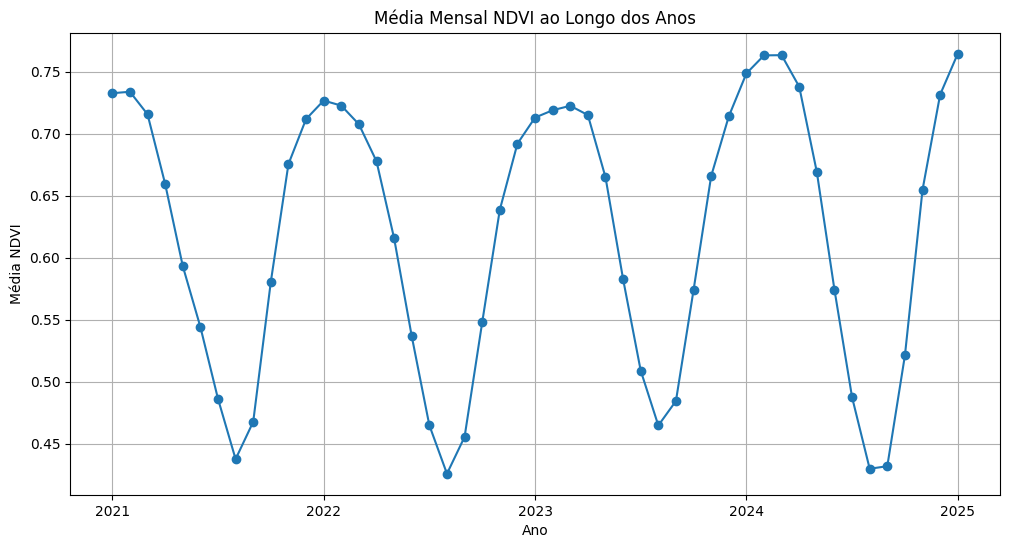

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("bra-ndvi-adm2-5ytd.csv", skiprows=1)

# Divinóplis BR3122306
df = df[df['#adm2+code'] == 'BR3122306']

df['#date'] = pd.to_datetime(df['#date'], errors='coerce')
df = df.dropna(subset=['#date'])

df['year'] = df['#date'].dt.year
df['month'] = df['#date'].dt.month

df = df[df['year'] >= 2021]

df['time_index'] = df['year'] + (df['month'] - 1) / 12  

media_mensal = df.groupby('time_index')['#indicator+vim+num'].mean()

plt.figure(figsize=(12,6))
plt.plot(media_mensal.index, media_mensal.values, marker='o', linestyle='-')

plt.xlabel("Ano")
plt.ylabel("Média NDVI")
plt.title("Média Mensal NDVI ao Longo dos Anos")

plt.xticks(ticks=range(int(df['year'].min()), int(df['year'].max()) + 1))

plt.grid()
plt.show()


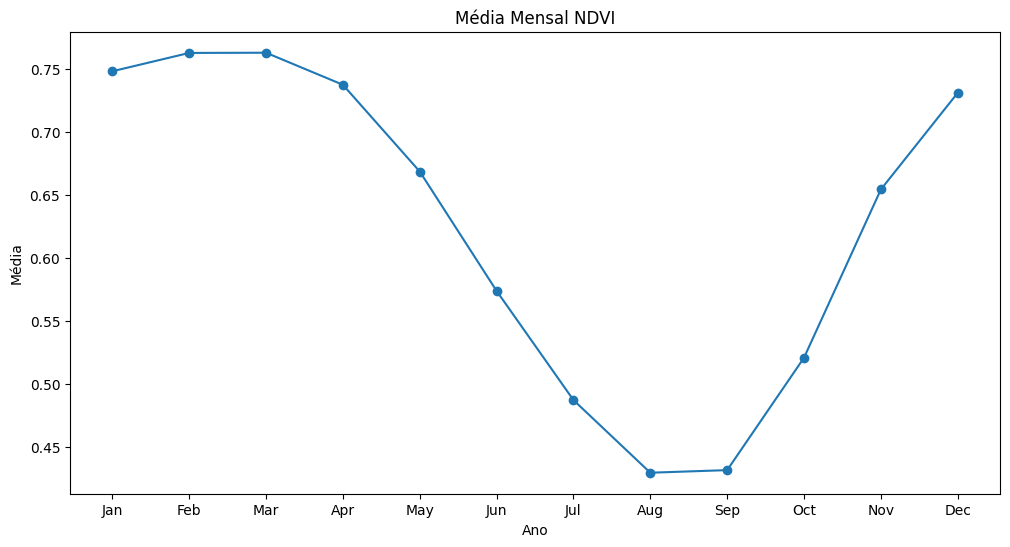

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("bra-ndvi-adm2-5ytd.csv", skiprows=1)

# Divinóplis BR3122306
df = df[df['#adm2+code'] == 'BR3122306']

df['#date'] = pd.to_datetime(df['#date'], errors='coerce')
df = df.dropna(subset=['#date'])

df['year'] = df['#date'].dt.year
df['month'] = df['#date'].dt.month

df = df[df['year'] == 2024]

df['time_index'] = df['year'] + (df['month'] - 1) / 12  

media_mensal = df.groupby('month')['#indicator+vim+num'].mean()

plt.figure(figsize=(12,6))
plt.plot(media_mensal.index, media_mensal.values, marker='o', linestyle='-')

plt.xlabel("Ano")
plt.ylabel("Média")
plt.title("Média Mensal NDVI")

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.xticks(ticks=media_mensal.index, labels=month_names)

plt.show()


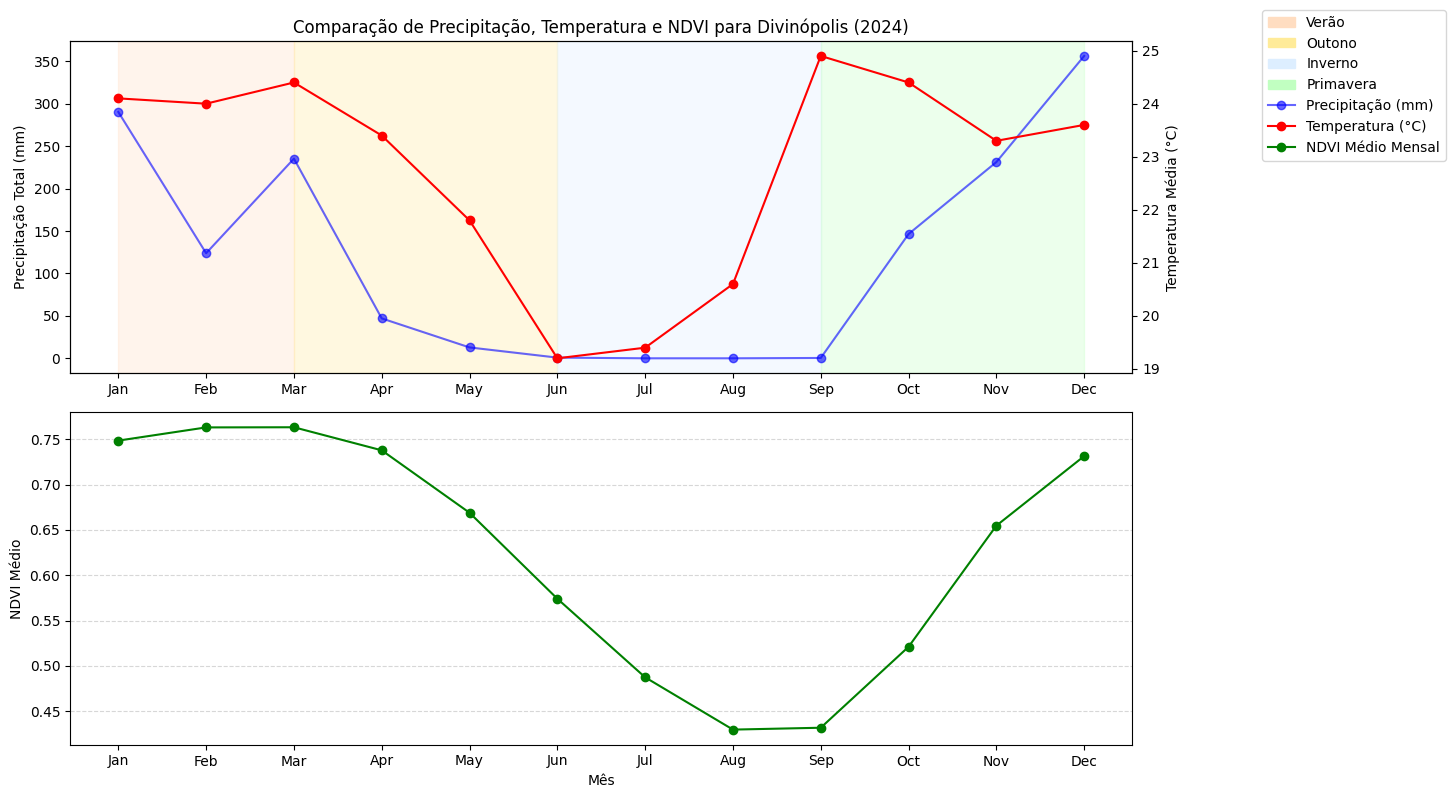

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

df = pd.read_csv("bra-ndvi-adm2-5ytd.csv", skiprows=1)

# Filtra os dados para o município de Divinópolis
df = df[df['#adm2+code'] == 'BR3122306']

df['#date'] = pd.to_datetime(df['#date'], errors='coerce')
df = df.dropna(subset=['#date'])

df['year'] = df['#date'].dt.year
df['month'] = df['#date'].dt.month

df = df[df['year'] == 2024]

df['time_index'] = df['year'] + (df['month'] - 1) / 12  

time_series_avg = df.groupby('time_index')['#indicator+vim+num'].mean()
time_series_avg.index = range(1, 13)

patches = []  

fig, ax = plt.subplots(nrows=2, figsize=(12, 8))  

df = pd.read_csv("dados_A564_M_2024-01-01_2024-12-31.csv", sep=';', decimal=',')

df["Data Medicao"] = pd.to_datetime(df["Data Medicao"], format="%Y-%m-%d")

df.drop(columns=["Unnamed: 3"], inplace=True)

df.columns = ["Data", "Precipitacao", "Temperatura"]

df["Precipitacao"] = pd.to_numeric(df["Precipitacao"], errors='coerce')

df.set_index("Data", inplace=True)

estacoes = {
    "Verão": (1, 3, "#FFDDC1"),  # Verão - Bege claro
    "Outono": (3, 6, "#FFEB99"),  # Outono - Amarelo claro
    "Inverno": (6, 9, "#DDEEFF"),  # Inverno - Azul claro
    "Primavera": (9, 12, "#C1FFC1")  # Primavera - Verde claro
}

for estacao, (inicio, fim, cor) in estacoes.items():
    ax[0].axvspan(inicio, fim, color=cor, alpha=0.3)
    patches.append(mpatches.Patch(color=cor, label=estacao))

precip_line, = ax[0].plot(range(1, 13), df["Precipitacao"], color='blue', marker='o', alpha=0.6, label='Precipitação (mm)')
ax[0].set_ylabel("Precipitação Total (mm)")
ax[0].set_xticks(range(1, 13))
ax[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax[0].tick_params(axis='y')

ax2 = ax[0].twinx()
temp_line, = ax2.plot(range(1, 13), df["Temperatura"], color='red', marker='o', label='Temperatura (°C)')
ax2.set_ylabel("Temperatura Média (°C)")
ax2.tick_params(axis='y')

ndvi_line, = ax[1].plot(time_series_avg.index, time_series_avg.values, marker='o', linestyle='-', color='green', label="NDVI Médio Mensal")

ax[1].set_xticks(range(1, 13))
ax[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax[1].set_xlabel("Mês")
ax[1].set_ylabel("NDVI Médio")
ax[1].grid(axis='y', linestyle='--', alpha=0.5)

total_legend = patches + [precip_line, temp_line, ndvi_line]

fig.legend(handles=total_legend, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.title("Comparação de Precipitação, Temperatura e NDVI para Divinópolis (2024)")

plt.tight_layout()
plt.show()


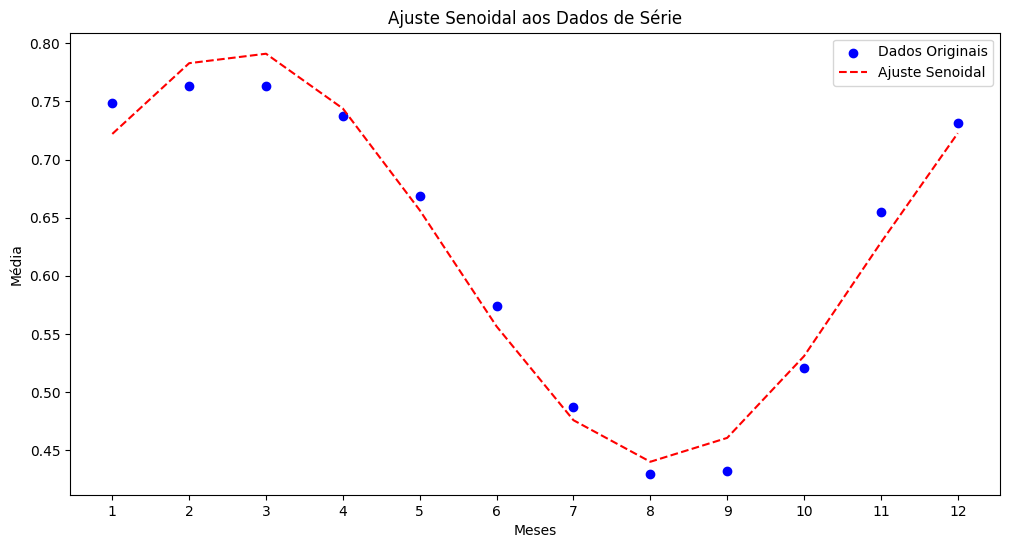

[ 0.17764579 -0.5715964   3.08119138  0.61710203]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def seno(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

popt, _ = curve_fit(seno, media_mensal.index, media_mensal.values, p0=[1, 0.1, 0, 0], maxfev=10000)

plt.figure(figsize=(12, 6))
plt.scatter(media_mensal.index, media_mensal.values, label="Dados Originais", color='blue')
plt.plot(media_mensal.index, seno(media_mensal.index, *popt), label="Ajuste Senoidal", color='red', linestyle='--')
plt.xlabel("Meses")
plt.ylabel("Média")
plt.title("Ajuste Senoidal aos Dados de Série")
plt.legend()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.xticks(ticks=media_mensal.index)

plt.show()

print(popt)